## EDA

In this notebook, we are going to explore the steam and users data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
steam       = pd.read_csv("..\Data\cleaned_steam.csv",index_col=0)
description = pd.read_csv("..\Data\cleaned_desc.csv",index_col=0)

In [3]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
description.head()

,steam_appid,detailed_description,genres
0,10,Play the world's number 1 online action game. ...,Action
1,20,One of the most popular online action games of...,Action
2,30,Enlist in an intense brand of Axis vs. Allied ...,Action
3,40,Enjoy fast-paced multiplayer gaming with Death...,Action
4,50,Return to the Black Mesa Research Facility as ...,Action


In [9]:
steam.groupby(["genres"])["appid"].count().sort_values(ascending=False).to_frame()

,appid
genres,
Action;Indie,2453
Casual;Indie,1685
Action;Adventure;Indie,1524
Adventure;Indie,1364
Action;Casual;Indie,1218
...,...
Action;Racing;RPG;Simulation,1
Action;Adventure;Racing;RPG;Simulation,1
Adventure;Casual;Simulation;Sports,1


In [5]:
steam['rating_10'] = round(steam['positive_ratings'] / (steam['positive_ratings'] + steam['negative_ratings']) * 10, 2)
steam.head(3)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_10
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,9.74
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,8.40
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,8.96


In [104]:
to_plot = steam.groupby(["genres", "rating_10"])["appid"].count().sort_values(ascending=False).reset_index()
to_plot

,genres,rating_10,appid
0,Action;Indie,10.00,357
1,Casual;Indie,10.00,279
2,Action;Casual;Indie,10.00,263
3,Indie,10.00,159
4,Action;Adventure;Indie,10.00,149
...,...,...,...
13712,Action;RPG,8.33,1
13713,Action;RPG,8.42,1
13714,Action;RPG,8.45,1
13715,Action;RPG,8.55,1


In [107]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

<BarContainer object of 10 artists>

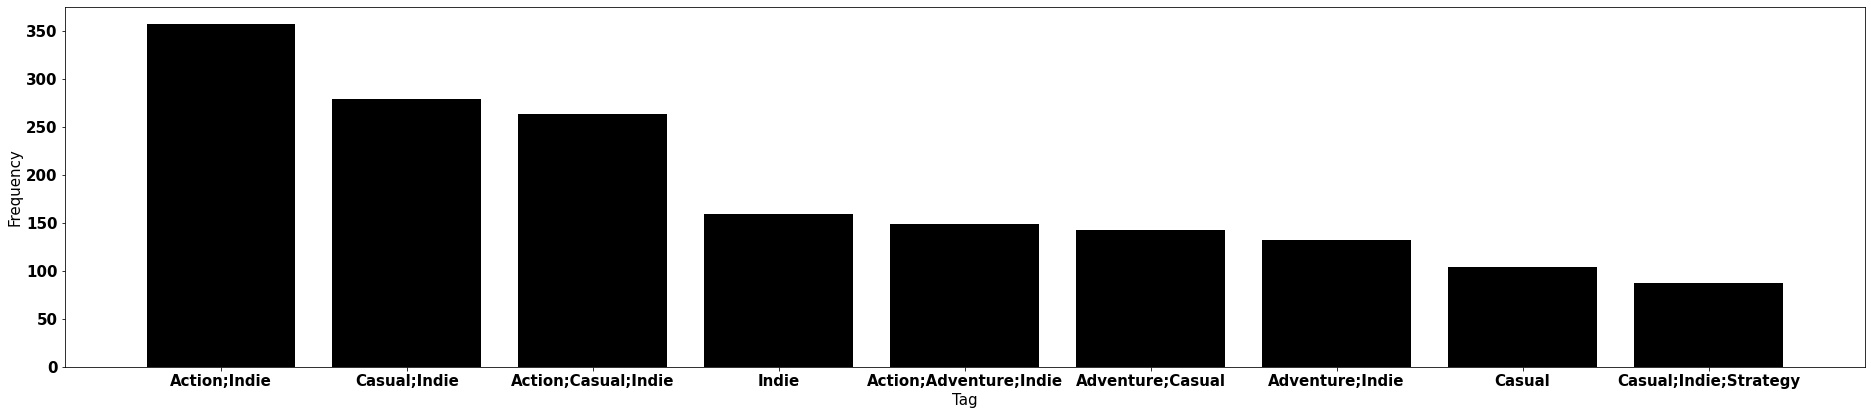

In [113]:
fig = plt.figure(figsize=(25,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Tag")
ax.set_ylabel("Frequency")
plt.bar(to_plot.genres.head(10), to_plot.appid.head(10),  color = "black")


In [103]:
to_plot = steam.groupby(["price"])["appid"].count().sort_values(ascending=False).reset_index()
to_plot

,price,appid
0,3.99,3202
1,0.79,2890
2,0.00,2464
3,6.99,2037
4,7.19,1298
...,...,...
266,2.30,1
267,9.95,1
268,2.28,1
269,2.26,1


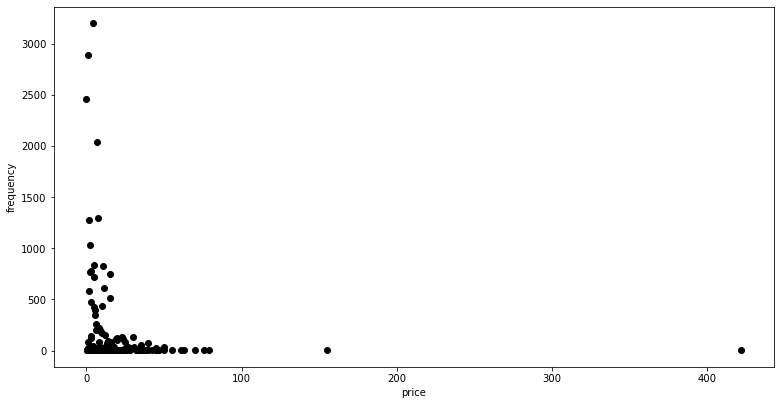

In [95]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("price")
ax.set_ylabel("frequency")

plt.scatter(to_plot.price,to_plot.appid, color = "black")